Произведен эксперимент, в котором участвовало несколько устройств с различными  номерами, находящимися на некотором расстоянии друг от друга. В течение эксперимента записывался файл n_log1.txt с сообщениями, которые присылали устройства. Скачайте файл n_log1.txt, изучите его структуру и содержимое строк (пакетов) в нем. Устройство с  номером A00000000001 в течение часа измеряло уровень сигнала link_power (результаты в списке link_power_arr) устройств, номера которых перечислены в списке capacitive_devices. В каждом отдельном пакете (строке) порядок элементов в capacitive_devices (список номеров устройств) и link_power_arr всегда совпадает, но в разных пакетах могут быть разные размеры списков и упорядоченность в них.

Реализовать на своем компьютере. 

Используя регулярные выражения, сделать шаблон для получения и, применив его, получить из файла n_log1.txt значений списков capacitive_devices и соответствующих им значений в link_power_arr. Указанные списки нужно получить из пакетов, содержащих подстроки «A00000000001 <--->» и «KEEP». На рисунке разместить два графика:  

1-й) За первый 10 минутный интервал времени. Ось абсцисс – время (указано в начале каждого пакета), ось ординат – значение из link_power_arr для устройства с  номером B00000000003. На графике точками отмечаем измеренные значения link_power, точки эти соединяем линией.

2-й) За второй 5 минутный интервал времени (за 5-ю, 6-ю,..., 9-ю мин). Ось абсцисс – время (указано в начале каждого пакета), ось ординат – значения из link_power_arr для устройств из списка capacitive_devices. Точки, полученные для каждого отдельного устройства из capacitive_devices, соединяем линиями разных цветов (в результате на графике появится несколько линий, каждая из которых соответствует конкретному устройству.).

На каждом графике полученные точки соединить линиями, подписать оси координат, названия графиков, легенду  (названия линий).

In [1]:
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [32]:
# Regular expression to extract the info (3 groups - time, capacitive_devices, link_power_arr)
pattern = r"(\d{2}:\d{2}:\d{2}).*A00000000001 <---> .*KEEP.*capacitive_devices=\[(.*)\],link_power_arr=\[(.*)\]\}"

times = []
times_b = []
link_power_b = []
capacitive_devices_data = {}
devices_values = {}

# Extract the required info
with open('D:/ucheba_4_kurs/Python_labs/lab_works_files/lab_works_files/n_log1.txt', 'r') as file:
    for line in file:
        # Find lines that are matched to our pattern
        match = re.search(pattern, line)
        if match:
            time_str, devices_str, link_power_str = match.groups()  
            time = datetime.strptime(time_str, '%H:%M:%S')
            devices = devices_str.split(',')
            link_power_values = [(x) for x in link_power_str.split(',')]
            # link_power_values = link_power_str.split(',')
            if len(link_power_values) > 0:
                # for 1st graph
                if 'B00000000003' in devices:
                    index = devices.index('B00000000003')
                    link_power_b.append(link_power_values[index])  # B00000000003
                    times_b.append(time)

            times.append(time)

            # for 2nd graph
            # for i, device in enumerate(devices):
            #     # if time.minute >= 5 and time.minute < 10:
            #         if device not in capacitive_devices_data:
            #             capacitive_devices_data[device] = []
            #         capacitive_devices_data[device].append(link_power_values[i]) 

            # for 2nd graph
            for i, device in enumerate(devices):
                if time.minute >= 5 and time.minute <= 10:
                    if time.minute == 10 and time.second >= 1:
                        break
                    if device not in devices_values:
                        devices_values[device] = {'time': [], 'values': []}
                    devices_values[device]['time'].append(time)
                    devices_values[device]['values'].append(link_power_values[i]) 

print(len(devices_values['B00000000003']['time']))
print(len(devices_values['B00000000003']['values']))

477
477


1-й) За первый 10 минутный интервал времени. Ось абсцисс – время (указано в начале каждого пакета), ось ординат – значение из link_power_arr для устройства с  номером B00000000003. На графике точками отмечаем измеренные значения link_power, точки эти соединяем линией.

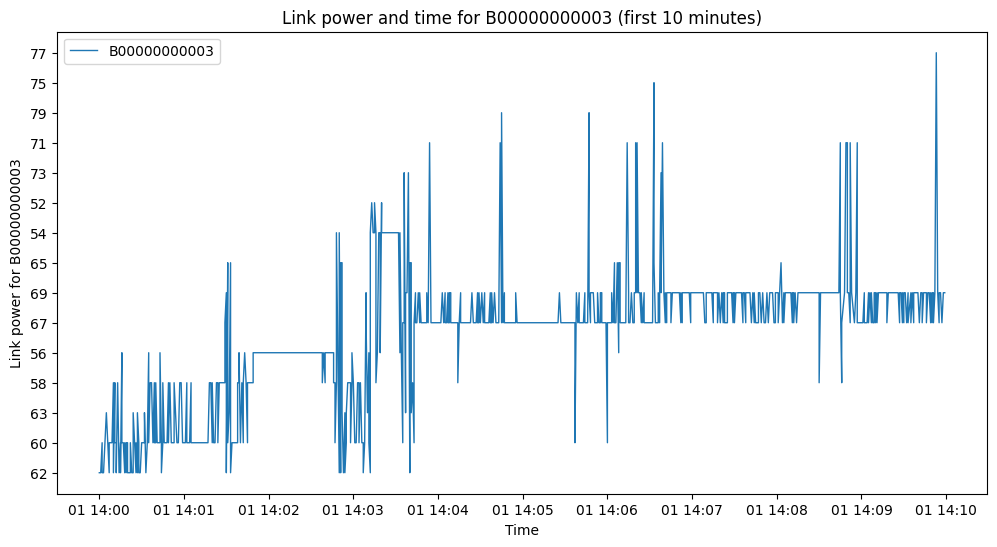

In [3]:
# Create the first graph
start_time = times_b[0]
end_time = start_time + timedelta(minutes=10)
x = [t for t in times_b if start_time <= t < end_time]
y = link_power_b[:len(x)]

plt.figure(figsize=(12, 6))
plt.plot(x, y, '-', label="B00000000003", linewidth = 1)
plt.xlabel('Time')
plt.ylabel('Link power for B00000000003')
plt.title('Link power and time for B00000000003 (first 10 minutes)')
plt.legend()
plt.show()

# 2, 3, 5 вариант

2-й) За второй 5 минутный интервал времени (за 5-ю, 6-ю,..., 9-ю мин). Ось абсцисс – время (указано в начале каждого пакета), ось ординат – значения из link_power_arr для устройств из списка capacitive_devices. Точки, полученные для каждого отдельного устройства из capacitive_devices, соединяем линиями разных цветов (в результате на графике появится несколько линий, каждая из которых соответствует конкретному устройству.).


B00000000001
B00000000002
B00000000003
B00000000004
B00000000005


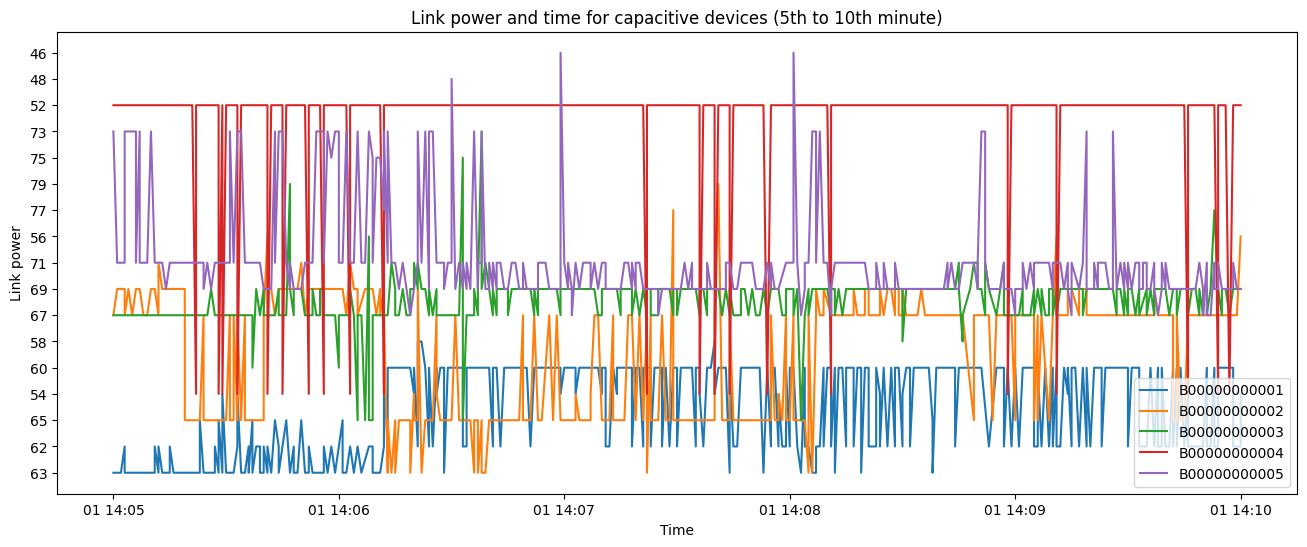

In [28]:
# Create the second graph
# start_time = times[0] + timedelta(minutes=5)
# end_time = start_time + timedelta(minutes=5)
# x = [t for t in times if start_time <= t < end_time]

# p = times.index(start_time) 
# print(x[0])
# print(p)


# p2 = times.index(end_time) 
# print(x[0])
# print(p2)


plt.figure(figsize=(16, 6))
# SORT KEYS!!!!!!!!!!
for device, values in sorted(devices_values.items()):
    print(device)
    plt.plot(values['time'], values['values'], label=device)

# plt.plot(devices_values['B00000000005']['time'], devices_values['B00000000005']['values'], label=device)

# for i, device in enumerate(capacitive_devices_data):
#     y = capacitive_devices_data[device][p:p2]
#     plt.plot(x, y, label=device)

plt.xlabel('Time')
plt.ylabel('Link power')
plt.title('Link power and time for capacitive devices (5th to 10th minute)')
plt.legend()
plt.show()

1-й) За первый 10 минутный интервал времени. Ось абсцисс – время (указано в начале каждого пакета), ось ординат – значение из link_power_arr для устройства с  номером B00000000003. На графике точками отмечаем измеренные значения link_power, точки эти соединяем линией.

2-й) За второй 5 минутный интервал времени (за 5-ю, 6-ю,..., 9-ю мин). Ось абсцисс – время (указано в начале каждого пакета), ось ординат – значения из link_power_arr для устройств из списка capacitive_devices. Точки, полученные для каждого отдельного устройства из capacitive_devices, соединяем линиями разных цветов (в результате на графике появится несколько линий, каждая из которых соответствует конкретному устройству.).

На каждом графике полученные точки соединить линиями, подписать оси координат, названия графиков, легенду  (названия линий).

B00000000001
B00000000002
B00000000003
B00000000004
B00000000005


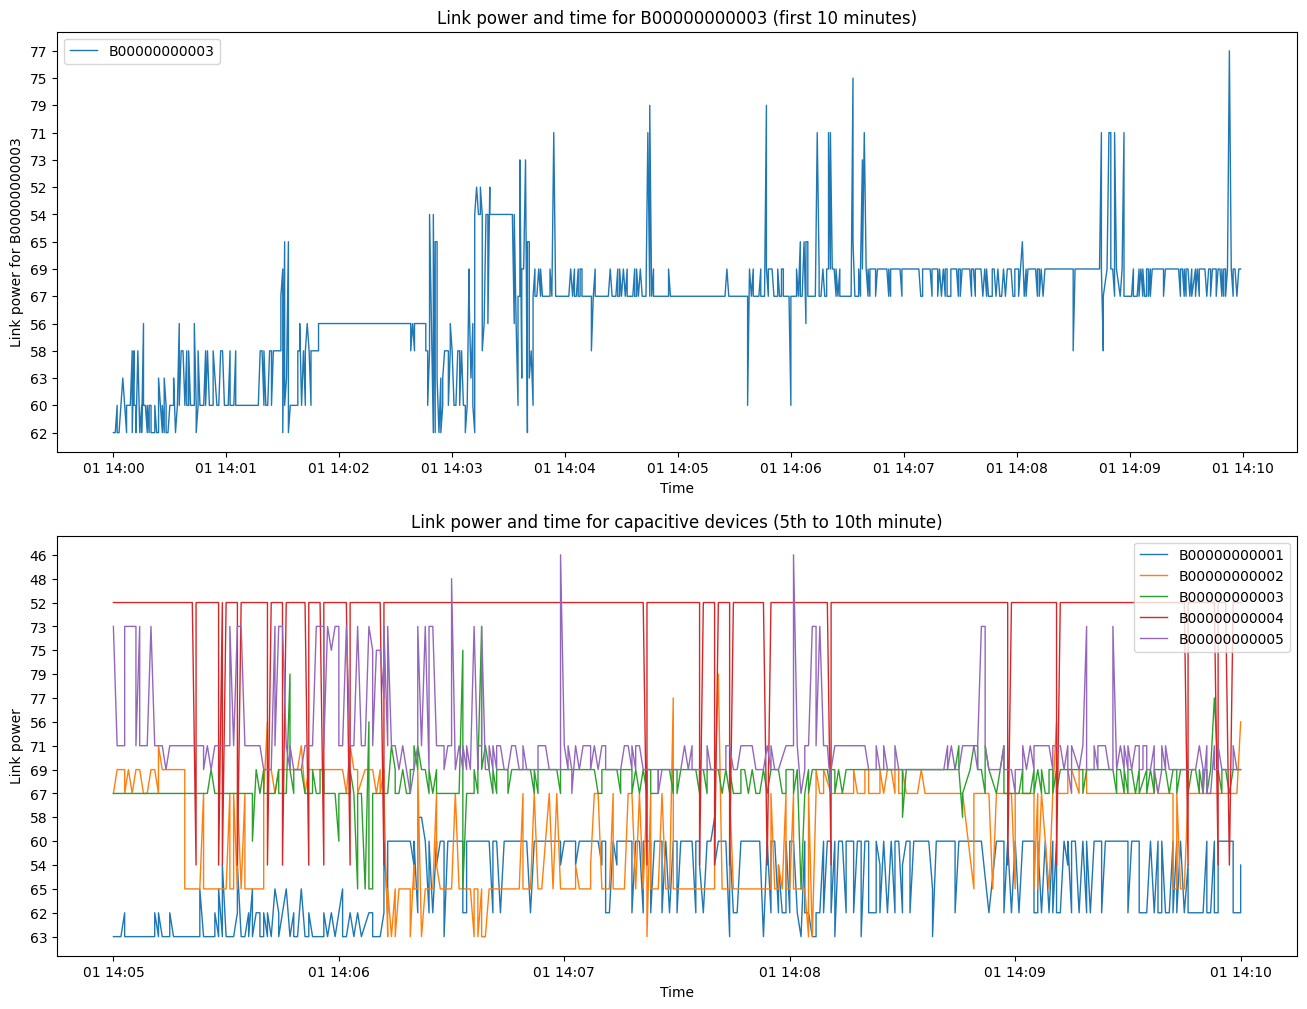

In [33]:
# Create the first graph
start_time = times_b[0]
end_time = start_time + timedelta(minutes=10)
x = [t for t in times_b if start_time <= t < end_time]
y = link_power_b[:len(x)]


fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# Draw 1st graph
ax1.plot(x, y, '-', label="B00000000003", linewidth = 1) 
ax1.set_xlabel('Time')
ax1.set_ylabel('Link power for B00000000003')
ax1.set_title('Link power and time for B00000000003 (first 10 minutes)')
ax1.legend()

for device, values in sorted(devices_values.items()):
    print(device)
    ax2.plot(values['time'], values['values'], label=device, linewidth = 1)

ax2.set_xlabel('Time')
ax2.set_ylabel('Link power')
ax2.set_title('Link power and time for capacitive devices (5th to 10th minute)')
ax2.legend()